<a href="https://colab.research.google.com/github/chamisfum/Kmeans_Opt_Data_Apotek/blob/master/K_Means_vs_PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
path = "/content/drive/My Drive/RESEARCH CENTER/THESIS RESEARCH/Apotek_Vinsia/"
df = pd.read_csv(path+'data_apotek.csv')
df.head()

,No,Nama,Harga,Stok,Jan,Feb,Mar,Aprl,Mei,Juni,Juli,Agst,Sep,Okt,Nov,Des
0,1,Mefinal,"Rp. 20.000,-/",210,2,13,17,20,15,21,18,21,15,11,12,17
1,2,Sanmol,"Rp. 15.000,-/",200,7,11,13,10,15,14,8,11,18,20,17,12
2,3,Hufagrip,"Rp 18.000,-/",150,2,8,6,10,12,15,12,11,13,18,13,12
3,4,Neurobion Putih,"Rp 19.500,-/",150,1,7,10,15,9,12,7,9,13,11,10,10
4,5,Lacto-B,"Rp 8.000,-/",250,4,23,26,20,22,28,22,20,19,15,23,21


In [ ]:
df = df.drop(['No'], axis=1)
filters = df.apply(lambda row : (row[1].split(",")[0].replace(" ","")), axis=1)
df["Harga"] = filters.apply(lambda row: row.split("p")[1].replace(".",""))
df[list(df.columns[1:])] = df[list(df.columns[1:])].apply(pd.to_numeric)
df.head()

,Nama,Harga,Stok,Jan,Feb,Mar,Aprl,Mei,Juni,Juli,Agst,Sep,Okt,Nov,Des
0,Mefinal,20000,210,2,13,17,20,15,21,18,21,15,11,12,17
1,Sanmol,15000,200,7,11,13,10,15,14,8,11,18,20,17,12
2,Hufagrip,18000,150,2,8,6,10,12,15,12,11,13,18,13,12
3,Neurobion Putih,19500,150,1,7,10,15,9,12,7,9,13,11,10,10
4,Lacto-B,8000,250,4,23,26,20,22,28,22,20,19,15,23,21


In [ ]:
df.dtypes

Nama     object
Harga     int64
Stok      int64
Jan       int64
Feb       int64
Mar       int64
Aprl      int64
Mei       int64
Juni      int64
Juli      int64
Agst      int64
Sep       int64
Okt       int64
Nov       int64
Des       int64
dtype: object

In [ ]:
df.describe()

,Harga,Stok,Jan,Feb,Mar,Aprl,Mei,Juni,Juli,Agst,Sep,Okt,Nov,Des
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.00000,161.000000
mean,14394.409938,152.608696,6.565217,9.627329,9.900621,10.900621,10.801242,10.987578,10.254658,10.844720,10.726708,10.403727,10.68323,10.726708
std,13930.650776,47.821566,4.401396,4.567302,4.352018,4.257647,3.487155,3.811147,3.735438,3.313908,4.325777,4.194310,4.90844,4.940885
min,1500.000000,60.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,1.000000,6.000000,1.000000,2.000000,2.00000,0.000000
25%,5000.000000,100.000000,2.000000,7.000000,7.000000,9.000000,9.000000,9.000000,9.000000,9.000000,8.000000,8.000000,8.00000,8.000000
50%,10000.000000,150.000000,6.000000,10.000000,10.000000,11.000000,11.000000,11.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000
75%,18000.000000,200.000000,10.000000,13.000000,11.000000,14.000000,12.000000,12.000000,11.000000,11.000000,13.000000,12.000000,12.00000,12.000000
max,86000.000000,350.000000,16.000000,30.000000,33.000000,35.000000,28.000000,31.000000,38.000000,32.000000,36.000000,34.000000,35.00000,35.000000


In [ ]:
X = df.iloc[:, 1:] 
X.head()

,Harga,Stok,Jan,Feb,Mar,Aprl,Mei,Juni,Juli,Agst,Sep,Okt,Nov,Des
0,20000,210,2,13,17,20,15,21,18,21,15,11,12,17
1,15000,200,7,11,13,10,15,14,8,11,18,20,17,12
2,18000,150,2,8,6,10,12,15,12,11,13,18,13,12
3,19500,150,1,7,10,15,9,12,7,9,13,11,10,10
4,8000,250,4,23,26,20,22,28,22,20,19,15,23,21


## **ALGORITHM**

In [ ]:
# from sklearn.cluster import KMeans
# from sklearn import preprocessing
# from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler, normalize 
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
# Standardize data
scaler = MinMaxScaler()
minmax = scaler.fit_transform(X) 
norm_df = normalize(minmax) 

In [ ]:
pca = PCA(n_components=2)
pca.fit(norm_df)
data = pca.transform(norm_df)
print("original shape:   ", norm_df.shape)
print("transformed shape:", data.shape)
data[:10]

original shape:    (161, 14)
transformed shape: (161, 2)


array([[-0.19451972,  0.24208174],
       [-0.11643093, -0.02761381],
       [-0.30978791,  0.04713036],
       [-0.26355283,  0.19120762],
       [-0.15633082,  0.24592171],
       [-0.25918306,  0.16898347],
       [-0.22641891,  0.1534572 ],
       [ 0.4228351 , -0.09153748],
       [-0.01907227,  0.05576625],
       [-0.23850781, -0.06234704]])

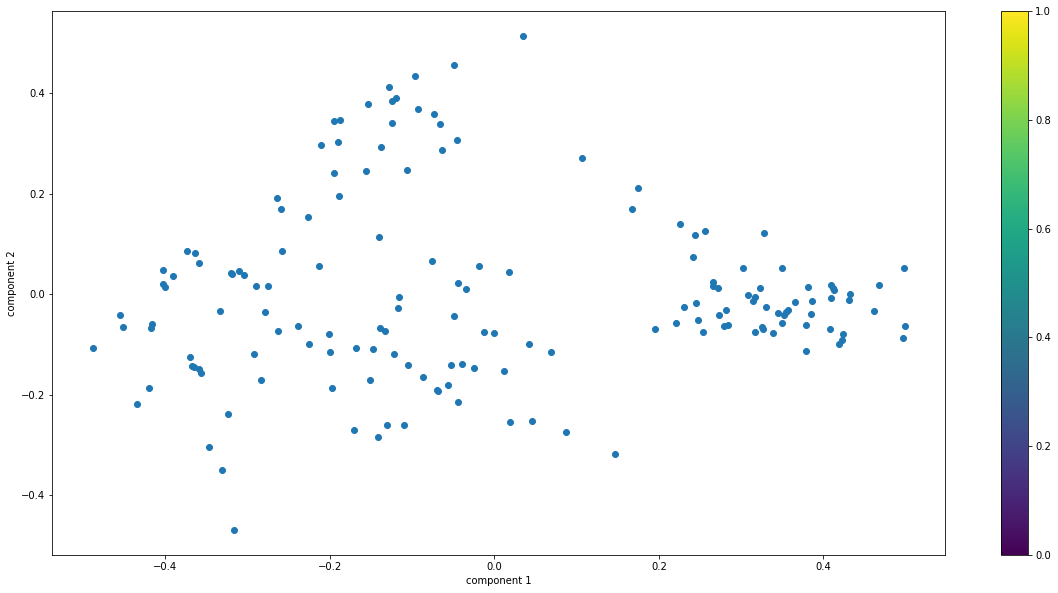

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
class KMeans:
    """K-Means clustering algorithm
        Attributes
        ----------
        n_cluster : int
            Num of cluster applied to data
        init_pp : bool
            Initialization method whether to use K-Means++ or not
            (the default is True, which use K-Means++)
        max_iter : int
            Max iteration to update centroid (the default is 300)
        tolerance : float
            Minimum centroid update difference value to stop iteration (the default is 1e-4)
        seed : int
            Seed number to use in random generator (the default is None)
        centroid : list
            List of centroid values
        SSE : float
            Sum squared error score
    """

    def __init__(
            self,
            n_cluster: int,
            init_pp: bool = True,
            max_iter: int = 300,
            tolerance: float = 1e-4,
            seed: int = None):
        """Instantiate K-Means object
        Parameters
        ----------
        n_cluster : int
            Num of cluster applied to data
        init_pp : bool, optional
            Initialization method whether to use K-Means++ or not
            (the default is True, which use K-Means++)
        max_iter : int, optional
            Max iteration to update centroid (the default is 100)
        tolerance : float, optional
            Minimum centroid update difference value to stop iteration (the default is 1e-4)
        seed : int, optional
            Seed number to use in random generator (the default is None)
        """

        self.n_cluster = n_cluster
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.init_pp = init_pp
        self.seed = seed
        self.centroid = None
        self.SSE = None

    def fit(self, data: np.ndarray):
        """Fit K-Means algorithm to given data
        Parameters
        ----------
        data : np.ndarray
            Data matrix to be fitted
        """
        self.centroid = self._init_centroid(data)
        for _ in range(self.max_iter):
            distance = self._calc_distance(data)
            cluster = self._assign_cluster(distance)
            new_centroid = self._update_centroid(data, cluster)
            diff = np.abs(self.centroid - new_centroid).mean()
            self.centroid = new_centroid

            if diff <= self.tolerance:
                break

        self.SSE = calc_sse(self.centroid, cluster, data)

    def predict(self, data: np.ndarray):
        """Predict new data's cluster using minimum distance to centroid
        Parameters
        ----------
        data : np.ndarray
            New data to be predicted
        """
        distance = self._calc_distance(data)
        # print(distance.shape)
        cluster = self._assign_cluster(distance)
        # print(cluster.shape)
        return cluster

    def _init_centroid(self, data: np.ndarray):
        """Initialize centroid using random method or KMeans++
        Parameters
        ----------
        data : np.ndarray
            Data matrix to sample from
        """
        if self.init_pp:
            np.random.seed(self.seed)
            centroid = [int(np.random.uniform()*len(data))]
            for _ in range(1, self.n_cluster):
                dist = []
                dist = [min([np.inner(data[c]-x, data[c]-x) for c in centroid])
                        for i, x in enumerate(data)]
                dist = np.array(dist)
                dist = dist / dist.sum()
                cumdist = np.cumsum(dist)

                prob = np.random.rand()
                for i, c in enumerate(cumdist):
                    if prob > c and i not in centroid:
                        centroid.append(i)
                        break
            centroid = np.array([data[c] for c in centroid])
        else:
            np.random.seed(self.seed)
            idx = np.random.choice(range(len(data)), size=(self.n_cluster))
            centroid = data[idx]
        # print(centroid)
        return centroid

    def _calc_distance(self, data: np.ndarray):
        """Calculate distance between data and centroids
        Parameters
        ----------
        data : np.ndarray
            Data which distance to be calculated
        """
        distances = []
        for c in self.centroid:
            distance = np.sum((data - c) * (data - c), axis=1)
            distances.append(distance)

        distances = np.array(distances)
        distances = distances.T
        return distances

    def _assign_cluster(self, distance: np.ndarray):
        """Assign cluster to data based on minimum distance to centroids
        Parameters
        ----------
        distance : np.ndarray
            Distance from each data to each centroid
        """
        cluster = np.argmin(distance, axis=1)
        return cluster

    def _update_centroid(self, data: np.ndarray, cluster: np.ndarray):
        """Update centroid from means of each cluster's data
        Parameters
        ----------
        data : np.ndarray
            Data matrix to get mean from
        cluster : np.ndarray
            Cluster label for each data
        """
        centroids = []
        for i in range(self.n_cluster):
            idx = np.where(cluster == i)
            centroid = np.mean(data[idx], axis=0)
            centroids.append(centroid)
        centroids = np.array(centroids)
        return centroids

In [ ]:
def calc_sse(centroids: np.ndarray, labels: np.ndarray, data: np.ndarray):
    distances = 0
    for i, c in enumerate(centroids):
        idx = np.where(labels == i)
        dist = np.sum((data[idx] - c)**2)
        distances += dist
    return distances

In [ ]:
def quantization_error(centroids: np.ndarray, labels: np.ndarray, data: np.ndarray) -> float:
    error = 0.0
    for i, c in enumerate(centroids):
        idx = np.where(labels == i)
        dist = np.linalg.norm(data[idx] - c)
        dist /= len(idx)
        error += dist
    error /= len(centroids)
    return error

In [ ]:
class Particle:
    """[summary]
    """

    def __init__(self,
                 n_cluster: int,
                 data: np.ndarray,
                 use_kmeans: bool = False,
                 w: float = 0.9,
                 c1: float = 0.5,
                 c2: float = 0.3):
        index = np.random.choice(list(range(len(data))), n_cluster)
        self.centroids = data[index].copy()
        if use_kmeans:
            kmeans = KMeans(n_cluster=n_cluster, init_pp=False)
            kmeans.fit(data)
            self.centroids = kmeans.centroid.copy()
        self.best_position = self.centroids.copy()
        self.best_score = quantization_error(self.centroids, self._predict(data), data)
        self.best_sse = calc_sse(self.centroids, self._predict(data), data)
        self.velocity = np.zeros_like(self.centroids)
        self._w = w
        self._c1 = c1
        self._c2 = c2

    def update(self, gbest_position: np.ndarray, data: np.ndarray):
        """Update particle's velocity and centroids
        
        Parameters
        ----------
        gbest_position : np.ndarray
        data : np.ndarray
        
        """
        self._update_velocity(gbest_position)
        self._update_centroids(data)

    def _update_velocity(self, gbest_position: np.ndarray):
        """Update velocity based on old value, cognitive component, and social component
        """

        v_old = self._w * self.velocity
        cognitive_component = self._c1 * np.random.random() * (self.best_position - self.centroids)
        social_component = self._c2 * np.random.random() * (gbest_position - self.centroids)
        self.velocity = v_old + cognitive_component + social_component

    def _update_centroids(self, data: np.ndarray):
        self.centroids = self.centroids + self.velocity
        new_score = quantization_error(self.centroids, self._predict(data), data)
        sse = calc_sse(self.centroids, self._predict(data), data)
        self.best_sse = min(sse, self.best_sse)
        if new_score < self.best_score:
            self.best_score = new_score
            self.best_position = self.centroids.copy()

    def _predict(self, data: np.ndarray) -> np.ndarray:
        """Predict new data's cluster using minimum distance to centroid
        """
        distance = self._calc_distance(data)
        cluster = self._assign_cluster(distance)
        return cluster

    def _calc_distance(self, data: np.ndarray) -> np.ndarray:
        """Calculate distance between data and centroids
        """
        distances = []
        for c in self.centroids:
            distance = np.sum((data - c) * (data - c), axis=1)
            distances.append(distance)

        distances = np.array(distances)
        distances = np.transpose(distances)
        return distances

    def _assign_cluster(self, distance: np.ndarray) -> np.ndarray:
        """Assign cluster to data based on minimum distance to centroids
        """
        cluster = np.argmin(distance, axis=1)
        return cluster

In [ ]:
class ParticleSwarmOptimizedClustering:
    def __init__(self,
                 n_cluster: int,
                 n_particles: int,
                 data: np.ndarray,
                 hybrid: bool = True,
                 max_iter: int = 100,
                 print_debug: int = 10):
        self.n_cluster = n_cluster
        self.n_particles = n_particles
        self.data = data
        self.max_iter = max_iter
        self.particles = []
        self.hybrid = hybrid

        self.print_debug = print_debug
        self.gbest_score = np.inf
        self.gbest_centroids = None
        self.gbest_sse = np.inf
        self._init_particles()

    def _init_particles(self):
        for i in range(self.n_particles):
            particle = None
            if i == 0 and self.hybrid:
                particle = Particle(self.n_cluster, self.data, use_kmeans=True)
            else:
                particle = Particle(self.n_cluster, self.data, use_kmeans=False)
            if particle.best_score < self.gbest_score:
                self.gbest_centroids = particle.centroids.copy()
                self.gbest_score = particle.best_score
            self.particles.append(particle)
            self.gbest_sse = min(particle.best_sse, self.gbest_sse)

    def run(self):
        print('Initial global best score', self.gbest_score)
        history = []
        for i in range(self.max_iter):
            for particle in self.particles:
                particle.update(self.gbest_centroids, self.data)
                # print(i, particle.best_score, self.gbest_score)
            for particle in self.particles:
                if particle.best_score < self.gbest_score:
                    self.gbest_centroids = particle.centroids.copy()
                    self.gbest_score = particle.best_score
            history.append(self.gbest_score)
            if i % self.print_debug == 0:
                print('Iteration {:04d}/{:04d} current gbest score {:.18f}'.format(
                    i + 1, self.max_iter, self.gbest_score))
        print('Finish with gbest score {:.18f}'.format(self.gbest_score))
        return history

### **K-Means**

In [ ]:
kmeans = KMeans(n_cluster=4, init_pp=False, seed=2018)
kmeans.fit(data)

In [ ]:
predicted_kmeans = kmeans.predict(data)
print('Silhouette:', silhouette_score(data, 
                                      predicted_kmeans))
print('SSE:', kmeans.SSE)
print('Quantization:', quantization_error(centroids=kmeans.centroid, 
                                          data=data, 
                                          labels=predicted_kmeans))

Silhouette: 0.5562307082263953
SSE: 2.5016982412438686
Quantization: 0.7863415666973358


In [ ]:
predicted_kmeans

array([0, 1, 2, 0, 0, 0, 0, 3, 1, 2, 3, 0, 1, 0, 2, 3, 2, 1, 3, 0, 3, 2,
       1, 0, 0, 0, 2, 3, 2, 2, 0, 3, 2, 2, 1, 1, 3, 3, 1, 2, 3, 2, 1, 3,
       3, 0, 1, 3, 1, 0, 2, 2, 3, 0, 3, 1, 1, 0, 2, 2, 1, 2, 1, 1, 3, 1,
       2, 0, 3, 3, 2, 2, 3, 3, 1, 2, 3, 1, 1, 3, 3, 3, 1, 2, 0, 3, 3, 2,
       3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 0, 1, 2, 3, 0, 3, 2, 3, 2, 2,
       3, 3, 3, 1, 1, 0, 0, 1, 1, 3, 0, 2, 1, 0, 3, 3, 1, 2, 3, 3, 1, 1,
       3, 2, 2, 3, 1, 1, 3, 3, 0, 2, 1, 3, 0, 3, 1, 3, 2, 2, 3, 3, 3, 1,
       1, 1, 3, 0, 1, 3, 1])

In [ ]:
Km1 = df.copy()
Km1["Cluster"] = predicted_kmeans
Km1.to_csv(path + 'Kmeans_Fix.csv', index=False)
Km1.head()

,Nama,Harga,Stok,Jan,Feb,Mar,Aprl,Mei,Juni,Juli,Agst,Sep,Okt,Nov,Des,Cluster
0,Mefinal,20000,210,2,13,17,20,15,21,18,21,15,11,12,17,0
1,Sanmol,15000,200,7,11,13,10,15,14,8,11,18,20,17,12,1
2,Hufagrip,18000,150,2,8,6,10,12,15,12,11,13,18,13,12,2
3,Neurobion Putih,19500,150,1,7,10,15,9,12,7,9,13,11,10,10,0
4,Lacto-B,8000,250,4,23,26,20,22,28,22,20,19,15,23,21,0


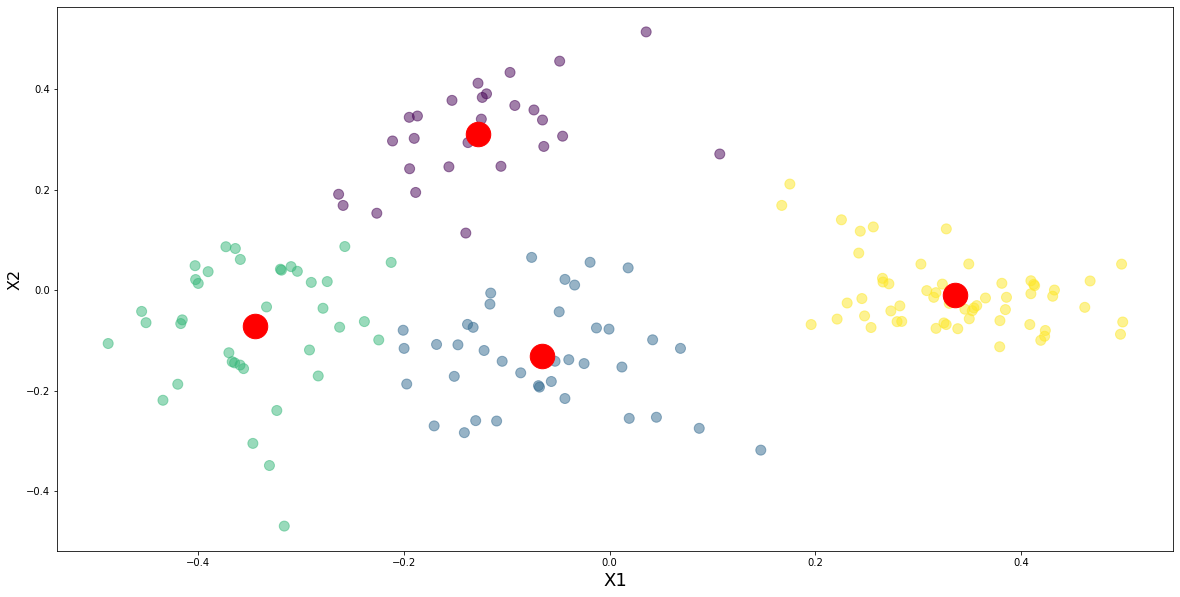

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(data[:, 0], data[:, 1], c=predicted_kmeans.astype(np.float), s=100, alpha=0.5)
plt.scatter(kmeans.centroid[:, 0], kmeans.centroid[:, 1], s=600, c='red')
plt.xlabel('X1', fontsize=18)
plt.ylabel('X2', fontsize=16)

plt.show()

### **PSO K-Means**

In [ ]:
pso = ParticleSwarmOptimizedClustering(n_cluster=4, 
                                       n_particles=10, 
                                       data=data, 
                                       hybrid=True,
                                       max_iter=2000, 
                                       print_debug=50)

In [ ]:
hist = pso.run()

Initial global best score 0.7858753318453698
Iteration 0001/2000 current gbest score 0.785875331845369840
Iteration 0051/2000 current gbest score 0.785875331845369840
Iteration 0101/2000 current gbest score 0.785875331845369840
Iteration 0151/2000 current gbest score 0.785875331845369840
Iteration 0201/2000 current gbest score 0.785875331845369840
Iteration 0251/2000 current gbest score 0.785875331845369840
Iteration 0301/2000 current gbest score 0.785875331845369840
Iteration 0351/2000 current gbest score 0.785875331845369840
Iteration 0401/2000 current gbest score 0.785875331845369729
Iteration 0451/2000 current gbest score 0.785875331845369729
Iteration 0501/2000 current gbest score 0.785875331845369729
Iteration 0551/2000 current gbest score 0.785875331845369729
Iteration 0601/2000 current gbest score 0.785875331845369729
Iteration 0651/2000 current gbest score 0.785875331845369729
Iteration 0701/2000 current gbest score 0.785875331845369729
Iteration 0751/2000 current gbest score 

In [ ]:
pso_kmeans = KMeans(n_cluster=4, init_pp=False, seed=2018)
pso_kmeans.centroid = pso.gbest_centroids.copy()

In [ ]:
predicted_pso = pso_kmeans.predict(data)
print('Silhouette:', silhouette_score(data, 
                                      predicted_pso))
print('SSE:', calc_sse(centroids=pso.gbest_centroids, 
                       data=data, 
                       labels=predicted_pso))
print('Quantization:', pso.gbest_score)

Silhouette: 0.5550155816011869
SSE: 2.500719240549823
Quantization: 0.7858753318453697


In [ ]:
predicted_pso

array([2, 3, 0, 2, 2, 2, 2, 1, 3, 0, 1, 2, 3, 2, 0, 1, 0, 3, 1, 2, 1, 0,
       3, 2, 2, 2, 0, 1, 0, 0, 2, 1, 0, 0, 3, 3, 1, 1, 3, 0, 1, 0, 3, 1,
       1, 2, 3, 1, 3, 2, 0, 0, 1, 2, 1, 3, 0, 2, 0, 0, 3, 0, 3, 3, 1, 3,
       0, 2, 1, 1, 0, 0, 1, 1, 3, 0, 1, 3, 3, 1, 1, 1, 3, 0, 2, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 3, 0, 1, 2, 1, 0, 1, 0, 0,
       1, 1, 1, 3, 3, 2, 2, 3, 3, 1, 2, 0, 3, 2, 1, 1, 3, 0, 1, 1, 3, 3,
       1, 0, 0, 1, 3, 3, 1, 1, 2, 0, 3, 1, 2, 1, 3, 1, 0, 0, 1, 1, 1, 3,
       3, 3, 1, 2, 3, 1, 3])

In [ ]:
Pso_Km1 = df.copy()
Pso_Km1["Cluster"] = predicted_pso
Pso_Km1.to_csv(path + 'PSO_Kmeans_Fix.csv', index=False)
Pso_Km1.head()

,Nama,Harga,Stok,Jan,Feb,Mar,Aprl,Mei,Juni,Juli,Agst,Sep,Okt,Nov,Des,Cluster
0,Mefinal,20000,210,2,13,17,20,15,21,18,21,15,11,12,17,2
1,Sanmol,15000,200,7,11,13,10,15,14,8,11,18,20,17,12,3
2,Hufagrip,18000,150,2,8,6,10,12,15,12,11,13,18,13,12,0
3,Neurobion Putih,19500,150,1,7,10,15,9,12,7,9,13,11,10,10,2
4,Lacto-B,8000,250,4,23,26,20,22,28,22,20,19,15,23,21,2


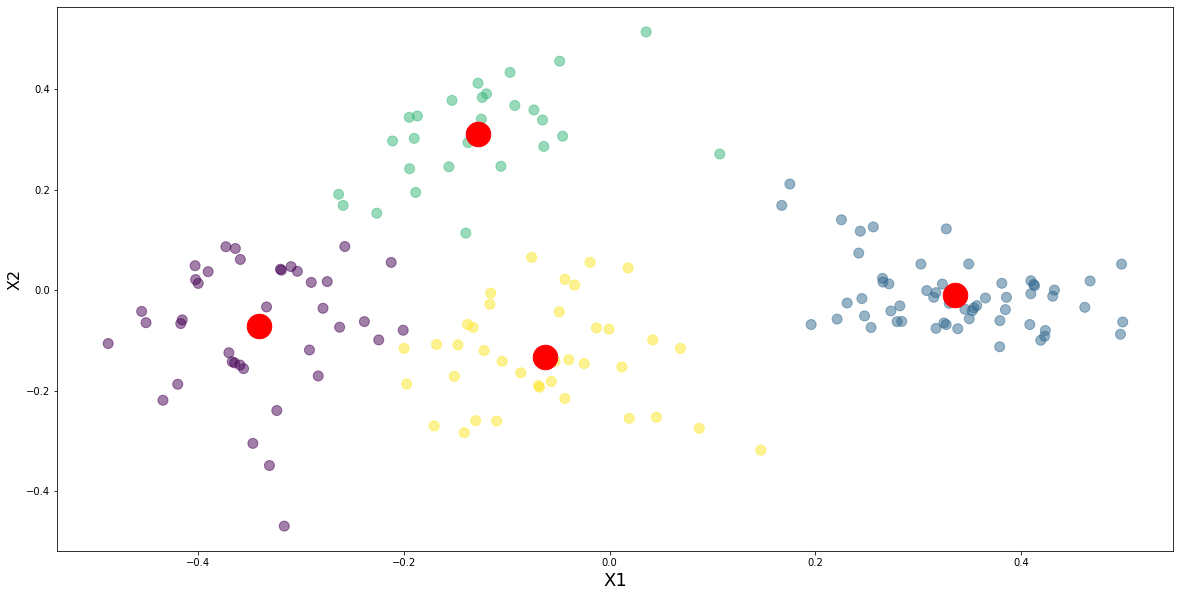

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(data[:, 0], data[:, 1], c=predicted_pso.astype(np.float), s=100, alpha=0.5)
plt.scatter(pso_kmeans.centroid[:, 0], pso_kmeans.centroid[:, 1], s=600, c='red')
plt.xlabel('X1', fontsize=18)
plt.ylabel('X2', fontsize=16)

plt.show()

### **Test evaluasi 3 model dengan iterasi**

In [ ]:
kmeanspp = {
    'silhouette': [],
    'sse' : [],
    'quantization' : [],
}
for _ in range(20):
    kmean_rep = KMeans(n_cluster=4, init_pp=True)
    kmean_rep.fit(data)
    predicted_kmean_rep = kmean_rep.predict(data)
    silhouette = silhouette_score(data, 
                                  predicted_kmean_rep)
    sse = kmean_rep.SSE
    quantization = quantization_error(centroids=kmean_rep.centroid, 
                                      data=data, 
                                      labels=predicted_kmean_rep)
    kmeanspp['silhouette'].append(silhouette)
    kmeanspp['sse'].append(sse)
    kmeanspp['quantization'].append(quantization)

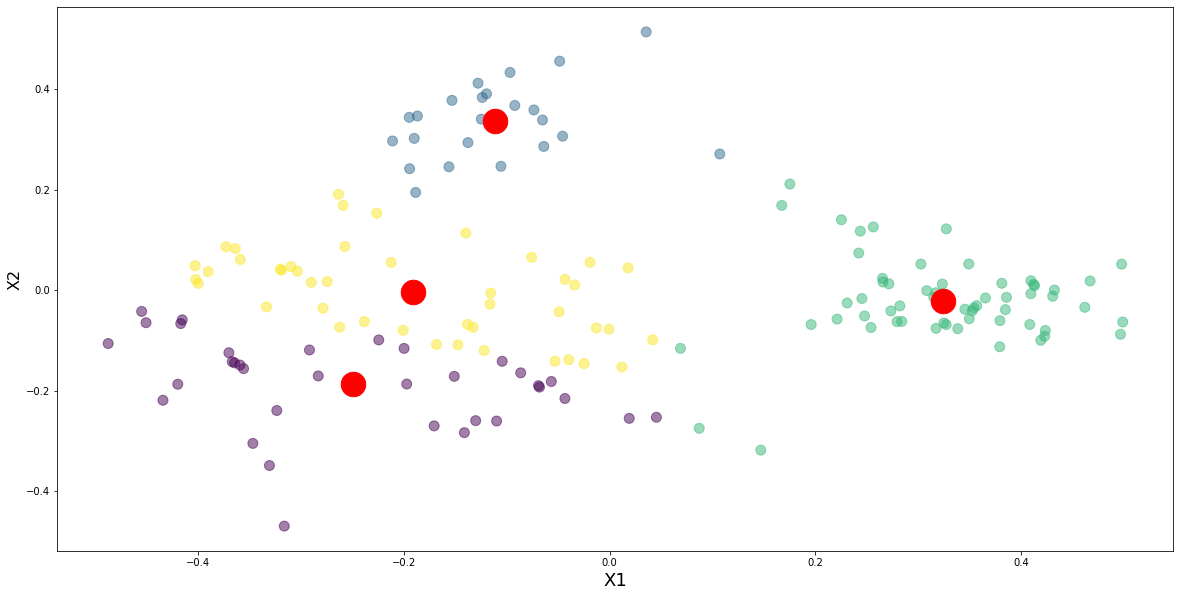

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(data[:, 0], data[:, 1], c=predicted_kmean_rep.astype(np.float), s=100, alpha=0.5)
plt.scatter(kmean_rep.centroid[:, 0], kmean_rep.centroid[:, 1], s=600, c='red')
plt.xlabel('X1', fontsize=18)
plt.ylabel('X2', fontsize=16)

plt.show()

In [ ]:
dat = df.copy()
dat["Cluster"] = predicted_kmean_rep
dat.to_csv(path + 'Kmeans_Fix_20_iterasi.csv', index=False)
dat.head()

,Nama,Harga,Stok,Jan,Feb,Mar,Aprl,Mei,Juni,Juli,Agst,Sep,Okt,Nov,Des,Cluster
0,Mefinal,20000,210,2,13,17,20,15,21,18,21,15,11,12,17,1
1,Sanmol,15000,200,7,11,13,10,15,14,8,11,18,20,17,12,3
2,Hufagrip,18000,150,2,8,6,10,12,15,12,11,13,18,13,12,3
3,Neurobion Putih,19500,150,1,7,10,15,9,12,7,9,13,11,10,10,3
4,Lacto-B,8000,250,4,23,26,20,22,28,22,20,19,15,23,21,1


In [ ]:
%%time
pso_plain = {
    'silhouette': [],
    'sse' : [],
    'quantization' : [],
}
for _ in range(20):
    pso_rep = ParticleSwarmOptimizedClustering(n_cluster=4, 
                                               n_particles=10, 
                                               data=data, 
                                               hybrid=False, 
                                               max_iter=2000, 
                                               print_debug=2000)
    pso_rep.run()
    pso_kmeans = KMeans(n_cluster=4, 
                        init_pp=False, 
                        seed=144)
    pso_kmeans.centroid = pso_rep.gbest_centroids.copy()
    predicted_pso_rep = pso_kmeans.predict(data)
    
    silhouette = silhouette_score(data, 
                                  predicted_pso_rep)
    sse = calc_sse(centroids=pso_rep.gbest_centroids, 
                   data=data, 
                   labels=predicted_pso_rep)
    quantization = pso_rep.gbest_score
    pso_plain['silhouette'].append(silhouette)
    pso_plain['sse'].append(sse)
    pso_plain['quantization'].append(quantization)

Initial global best score 0.914369646517422
Iteration 0001/2000 current gbest score 0.914369646517422030
Finish with gbest score 0.831859990882332534
Initial global best score 0.9674293945476135
Iteration 0001/2000 current gbest score 0.967429394547613453
Finish with gbest score 0.848128209079275552
Initial global best score 0.9658635077121276
Iteration 0001/2000 current gbest score 0.965863507712127589
Finish with gbest score 0.851230813868168568
Initial global best score 1.0958808786320315
Iteration 0001/2000 current gbest score 1.095880878632031541
Finish with gbest score 0.936675464305067096
Initial global best score 0.9379906789613838
Iteration 0001/2000 current gbest score 0.937990678961383773
Finish with gbest score 0.831082676072837145
Initial global best score 0.9552901501273734
Iteration 0001/2000 current gbest score 0.955290150127373394
Finish with gbest score 0.822111807813782125
Initial global best score 0.8843504610510308
Iteration 0001/2000 current gbest score 0.88435046

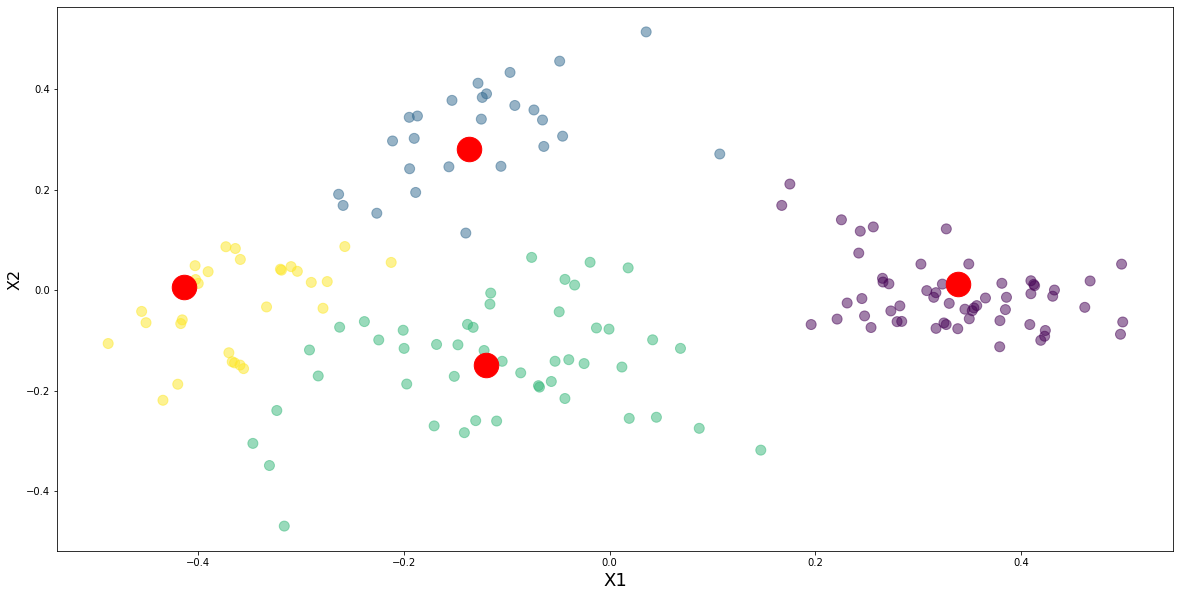

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(data[:, 0], data[:, 1], c=predicted_pso_rep.astype(np.float), s=100, alpha=0.5)
plt.scatter(pso_kmeans.centroid[:, 0], pso_kmeans.centroid[:, 1], s=600, c='red')
plt.xlabel('X1', fontsize=18)
plt.ylabel('X2', fontsize=16)

plt.show()

In [ ]:
dat = df.copy()
dat["Cluster"] = predicted_pso_rep
dat.to_csv(path + 'PSO_Kmeans_Fix_20_iterasi_Hybrid_False.csv', index=False)
dat.head()

,Nama,Harga,Stok,Jan,Feb,Mar,Aprl,Mei,Juni,Juli,Agst,Sep,Okt,Nov,Des,Cluster
0,Mefinal,20000,210,2,13,17,20,15,21,18,21,15,11,12,17,1
1,Sanmol,15000,200,7,11,13,10,15,14,8,11,18,20,17,12,2
2,Hufagrip,18000,150,2,8,6,10,12,15,12,11,13,18,13,12,3
3,Neurobion Putih,19500,150,1,7,10,15,9,12,7,9,13,11,10,10,1
4,Lacto-B,8000,250,4,23,26,20,22,28,22,20,19,15,23,21,1


In [ ]:
%%time
pso_hybrid = {
    'silhouette': [],
    'sse' : [],
    'quantization' : [],
}
for _ in range(20):
    pso_rep2 = ParticleSwarmOptimizedClustering(n_cluster=4, 
                                               n_particles=10, 
                                               data=data, 
                                               hybrid=True, 
                                               max_iter=2000, 
                                               print_debug=2000)
    pso_rep2.run()
    pso_kmeans2 = KMeans(n_cluster=4, 
                        init_pp=False, 
                        seed=144)
    pso_kmeans2.centroid = pso_rep2.gbest_centroids.copy()
    predicted_pso_rep2 = pso_kmeans2.predict(data)
    
    silhouette = silhouette_score(data, 
                                  predicted_pso_rep2)
    sse = calc_sse(centroids=pso_rep2.gbest_centroids, 
                   data=data, 
                   labels=predicted_pso_rep2)
    quantization = pso_rep2.gbest_score
    pso_hybrid['silhouette'].append(silhouette)
    pso_hybrid['sse'].append(sse)
    pso_hybrid['quantization'].append(quantization)

Initial global best score 0.7858753318453698
Iteration 0001/2000 current gbest score 0.785875331845369840
Finish with gbest score 0.785875331845369729
Initial global best score 0.7863415666973357
Iteration 0001/2000 current gbest score 0.786341566697335681
Finish with gbest score 0.785880227659381925
Initial global best score 0.7863415666973357
Iteration 0001/2000 current gbest score 0.786341566697335681
Finish with gbest score 0.785917308516829838
Initial global best score 0.7858753318453698
Iteration 0001/2000 current gbest score 0.785875331845369840
Finish with gbest score 0.785875331845369729
Initial global best score 0.7858753318453698
Iteration 0001/2000 current gbest score 0.785875331845369840
Finish with gbest score 0.785875331845369729
Initial global best score 0.7858753318453698
Iteration 0001/2000 current gbest score 0.785875331845369840
Finish with gbest score 0.785875331845369729
Initial global best score 0.7863415666973357
Iteration 0001/2000 current gbest score 0.7863415

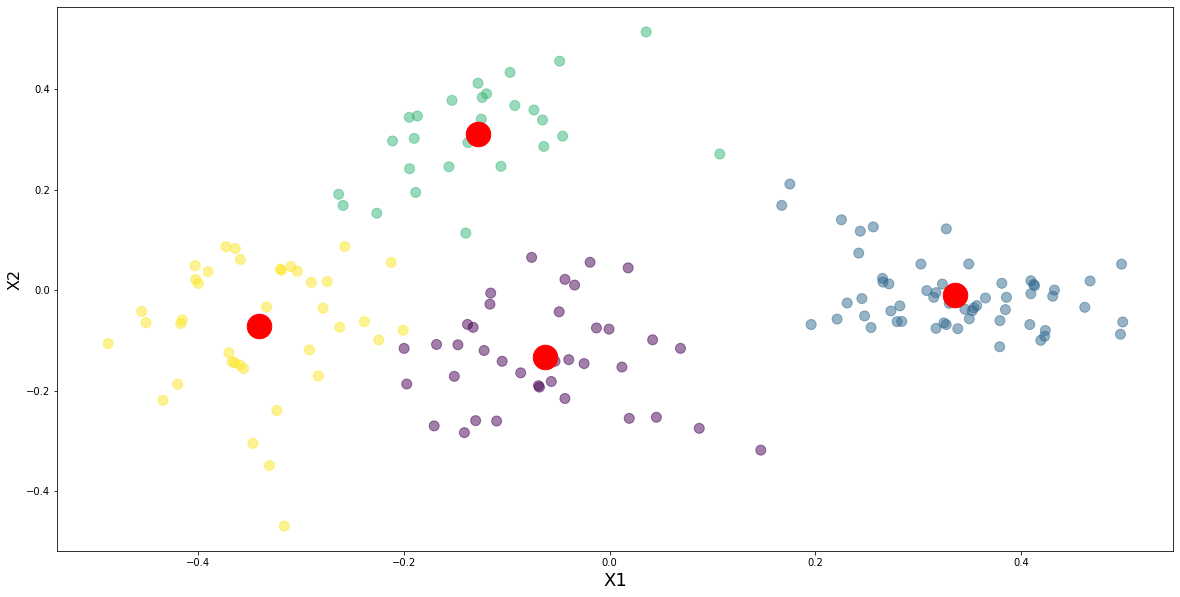

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(data[:, 0], data[:, 1], c=predicted_pso_rep2.astype(np.float), s=100, alpha=0.5)
plt.scatter(pso_kmeans2.centroid[:, 0], pso_kmeans2.centroid[:, 1], s=600, c='red')
plt.xlabel('X1', fontsize=18)
plt.ylabel('X2', fontsize=16)

plt.show()

In [ ]:
dat = df.copy()
dat["Cluster"] = predicted_pso_rep
dat.to_csv(path + 'PSO_Kmeans_Fix_20_iterasi_Hybrid_True.csv', index=False)
dat.head()

,Nama,Harga,Stok,Jan,Feb,Mar,Aprl,Mei,Juni,Juli,Agst,Sep,Okt,Nov,Des,Cluster
0,Mefinal,20000,210,2,13,17,20,15,21,18,21,15,11,12,17,1
1,Sanmol,15000,200,7,11,13,10,15,14,8,11,18,20,17,12,2
2,Hufagrip,18000,150,2,8,6,10,12,15,12,11,13,18,13,12,3
3,Neurobion Putih,19500,150,1,7,10,15,9,12,7,9,13,11,10,10,1
4,Lacto-B,8000,250,4,23,26,20,22,28,22,20,19,15,23,21,1


In [ ]:
benchmark = {
    'method' : ['K-Means++', 'PSO', 'PSO Hybrid'],
    'sse_mean' : [
        np.around(np.mean(kmeanspp['sse']), decimals=10),
        np.around(np.mean(pso_plain['sse']), decimals=10),
        np.around(np.mean(pso_hybrid['sse']), decimals=10),
    ],
    'sse_stdev' : [
        np.around(np.std(kmeanspp['sse']), decimals=10),
        np.around(np.std(pso_plain['sse']), decimals=10),
        np.around(np.std(pso_hybrid['sse']), decimals=10),
    ],
    'silhouette_mean' : [
        np.around(np.mean(kmeanspp['silhouette']), decimals=10),
        np.around(np.mean(pso_plain['silhouette']), decimals=10),
        np.around(np.mean(pso_hybrid['silhouette']), decimals=10),
    ],
    'silhouette_stdev' : [
        np.around(np.std(kmeanspp['silhouette']), decimals=10),
        np.around(np.std(pso_plain['silhouette']), decimals=10),
        np.around(np.std(pso_hybrid['silhouette']), decimals=10),
    ],
    'quantization_mean' : [
        np.around(np.mean(kmeanspp['quantization']), decimals=10),
        np.around(np.mean(pso_plain['quantization']), decimals=10),
        np.around(np.mean(pso_hybrid['quantization']), decimals=10),
    ],
    'quantization_stdev' : [
        np.around(np.std(kmeanspp['quantization']), decimals=10),
        np.around(np.std(pso_plain['quantization']), decimals=10),
        np.around(np.std(pso_hybrid['quantization']), decimals=10),
    ],
}

In [ ]:
eval = pd.DataFrame.from_dict(benchmark)
eval.to_csv(path + 'benchmark_evaluation.csv', index=False)
eval

,method,sse_mean,sse_stdev,silhouette_mean,silhouette_stdev,quantization_mean,quantization_stdev
0,K-Means++,2.591509,0.269922,0.545380,0.031947,0.797071,0.032422
1,PSO,3.498503,0.611213,0.461515,0.068681,0.839285,0.031336
2,PSO Hybrid,2.500998,0.000643,0.554859,0.000469,0.785877,0.000032
